In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential

## 1. Introduction

1. NN internally build representations of patterns in the data
2. They partially replace the need for feature engineering
3. Deeper NN with more hidden layers are able to build increasingly sophisticated representations of the raw data
4. Is easier and faster to apply to unstructured data where FE is a challenge and easily interpreted models are not
   a requirement (e.g. images and sounds).

  

## 2. Forward Propagation

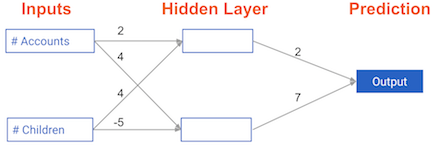

In [7]:
# input data, representing one record of # Accounts = 3 and # Children = 5

input_data = np.array([3, 5]) 

# weights going into every node in the NN
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([4, -5]), 'output': np.array([2, 7])}


In [8]:
# forward propagation to generate a prediction

# Calculate node 0 value: node_0_value
node_0_value = (input_data* weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data* weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs* weights['output']).sum()

# Print output
print(output)

-39


## 3. Activation functions

In [9]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [12]:
# applying to multiple data points and generating predictions

input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row*weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row*weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs*weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


## 4. Gradient Descent

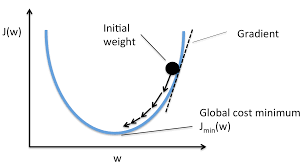

### if the slove is positive:
- go opposite to the slope means moving the weight value to smaller numbers
- this is done by subtracting the slope of the loss/cost function (e.g. MSE) from the current value of the weight
- too big a step can lead us astray, a learning rate helps us to keep on track

In [13]:
# example

input_data = np.array([1,2,3]) # single data point

weights = np.array([0, 2, 1]) # one layer with three nodes

target = 0 

# Calculate the predictions: preds
preds = (weights*input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error  # for mse

# Print the slope
print(slope)


[14 28 42]


In [14]:
# updating weights and prediction using gradient descent

# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate*slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated*input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


In [20]:
def get_slope(input_data, target, weights):
    
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = preds - target

    # Calculate the slope: slope
    slope = 2 * input_data * error

    return slope

def get_mse(input_data, target, weights):
    
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()
    mse = mean_squared_error([target], [preds])
    
    return mse

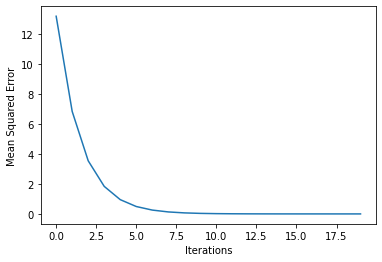

In [21]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## 5. Back Propagation

## 6. Introduction to Keras

In [52]:
# read data

df = pd.read_csv("https://assets.datacamp.com/production/repositories/654/datasets/8a57adcdb5bfb3e603dad7d3c61682dfe63082b8/hourly_wages.csv")

In [53]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [54]:
df.shape

(534, 10)

In [55]:
predictors = df.drop('wage_per_hour', axis=1).values
target = df['wage_per_hour'].values

In [67]:
# build model with 2 hidden layers and relu activation (not in the ouput)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols, )))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

In [68]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [70]:
# Fit the model
model.fit(predictors, target, verbose=2, epochs=30)

Epoch 1/30
17/17 - 0s - loss: 19.8788
Epoch 2/30
17/17 - 0s - loss: 20.0489
Epoch 3/30
17/17 - 0s - loss: 19.8346
Epoch 4/30
17/17 - 0s - loss: 19.8577
Epoch 5/30
17/17 - 0s - loss: 19.5713
Epoch 6/30
17/17 - 0s - loss: 19.5178
Epoch 7/30
17/17 - 0s - loss: 19.9111
Epoch 8/30
17/17 - 0s - loss: 19.5322
Epoch 9/30
17/17 - 0s - loss: 19.3950
Epoch 10/30
17/17 - 0s - loss: 19.4112
Epoch 11/30
17/17 - 0s - loss: 19.4635
Epoch 12/30
17/17 - 0s - loss: 19.3118
Epoch 13/30
17/17 - 0s - loss: 19.4675
Epoch 14/30
17/17 - 0s - loss: 19.1877
Epoch 15/30
17/17 - 0s - loss: 19.1591
Epoch 16/30
17/17 - 0s - loss: 19.1426
Epoch 17/30
17/17 - 0s - loss: 19.4564
Epoch 18/30
17/17 - 0s - loss: 19.4623
Epoch 19/30
17/17 - 0s - loss: 19.1917
Epoch 20/30
17/17 - 0s - loss: 18.9672
Epoch 21/30
17/17 - 0s - loss: 19.2168
Epoch 22/30
17/17 - 0s - loss: 18.9291
Epoch 23/30
17/17 - 0s - loss: 19.2303
Epoch 24/30
17/17 - 0s - loss: 19.1673
Epoch 25/30
17/17 - 0s - loss: 18.9454
Epoch 26/30
17/17 - 0s - loss: 19.

In [63]:
# save a model

model.save('nn_model.h5')

In [64]:
# load model again

from keras.models import load_model

my_model = load_model('nn_model.h5')

In [65]:
# use model to predict

predictions = my_model.predict(predictors)

### 6.1 Early stopping in fitting models

In [75]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# rebuild a new model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols, )))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

# Fit the model
model_training = model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])


Epoch 1/30
12/12 [==============================] - 1s 26ms/step - loss: 203.4831 - val_loss: 104.5361
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 51.8476 - val_loss: 41.1989
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 26.9549 - val_loss: 33.8561
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 24.6367 - val_loss: 32.9021
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 19.9755 - val_loss: 29.5918
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 22.1793 - val_loss: 26.5521
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 20.8283 - val_loss: 26.4166
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 17.6890 - val_loss: 25.5314
Epoch 9/30
12/12 [==============================] - 0s 4ms/step - loss: 16.6257 - val_loss: 25.3563
Epoch 10/30
12/12 [==============================] - ETA: 0s - loss: 23.01 - 0s 3ms/step - loss: 

Text(0.5, 0, 'Epochs')

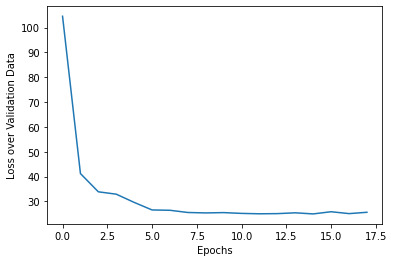

In [79]:
plt.plot(model_training.history['val_loss'])

plt.ylabel("Loss over Validation Data")
plt.xlabel("Epochs")

### 6.2 Adding more layers

In [88]:
# rebuild a new model
model_new = Sequential()

# Add the first layer
model_new.add(Dense(50, activation='relu', input_shape=(n_cols, )))

# Add the second layer
model_new.add(Dense(32, activation='relu'))

# Add the third layer
model_new.add(Dense(32, activation='relu'))

# Add the output layer
model_new.add(Dense(1))

# Compile the model
model_new.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
# Fit the model
model_training_new = model_new.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])


Epoch 1/30
12/12 [==============================] - 1s 19ms/step - loss: 85.8819 - val_loss: 43.1785
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 20.9959 - val_loss: 31.7213
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 24.0784 - val_loss: 31.3764
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 20.3650 - val_loss: 30.9671
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 20.2095 - val_loss: 27.6230
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 26.5041 - val_loss: 27.1185
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 16.6984 - val_loss: 25.3707
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 18.1725 - val_loss: 25.4062
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 21.3834 - val_loss: 25.2956
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 18.0279 - val_loss: 26.032

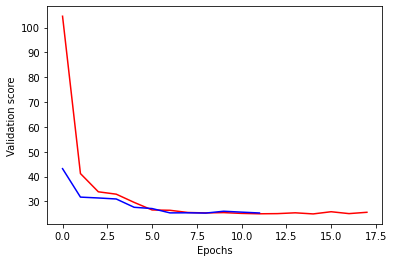

In [90]:
# Create the plot to compare models 

plt.plot(model_training.history['val_loss'], 'r', model_training_new.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()